<a href="https://colab.research.google.com/github/VinayNooji/FourthBrain/blob/main/4_1_Label_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Label Propagation

## Label propagation is similar to training a classification model and then using that model to make predictions on test data. The key difference is that in general, our analogue to the test data has no labels against which to evaluate our model. In this exercise, we keep the entire set of true labels for illustrative purposes, but the vast marjority of them play no role in training the model. 

## This exercise is adapted from scikit-learn's [tutorial](https://scikit-learn.org/stable/auto_examples/semi_supervised/plot_label_propagation_digits.html) on zero shot learning .

### Load the necessary modules and functions

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

from sklearn import datasets
from sklearn.semi_supervised import LabelSpreading

from sklearn.metrics import confusion_matrix, classification_report

In [72]:
a = np.arange(50)
np.put(a, range(5, 50), -5)
a

array([ 0,  1,  2,  3,  4, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5,
       -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5,
       -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5])

### Exercise: Load and preprocess the data. 
1. Shuffle the indices
2. Use the shuffled indices to extract 1000 random samples from the features data
3. Extract the corresponding 1000 labels and images
4. Copy the labels. Treat the first 50 shuffled samples as labeled data and the rest as unlabeled data. Replace the labels after the first 50 with -1.

We'll use this copy of our labels (with 50 labels known and the other 950 hidden) to train our model, and use the original copy (with all 1000 labels known) to evaluate the model.

### Club the exercises to a single ***monolithic*** function

### Exercise: Train the label propagation model with `gamma = 0.25` and `max_iter = 20`

### Make sure you pass in the correct version of the target array, i.e. the one containing unlabeled data

### Exercise: Evaluate the model's performance on the unlabeled data

### Exercise: Find the 10 most uncertain labels in descending order of uncertainty, i.e. the labels for which the model made the least confident predictions. Plot the associated images. Observe any discrepancies between predicted and true labels. Do you see any patterns? What might account for them? 

In [119]:
def label_exercise_function(number_of_total_samples=1000, number_of_known_labels=50):
  # Load the digits dataset
  # digits = {data,target,indices}; n = 1797
  digits = datasets.load_digits()

  # Set the random state to 2 for reproducibility
  rng = np.random.RandomState(2)

  ### START CODE HERE ###
  # Initialize the indices as an ordered array, with each element corresponding to a sample in the dataset
  indices = np.arange(digits.data.shape[0])
  #print(indices)
  #print(digits.data.shape)
  #print(len(indices))
  # Shuffle the indices
  rng.shuffle(indices)
  #print(indices)
  # Use the shuffled indices to extract 1000 feature vectors, labels, and images
  n_total_samples = indices[:number_of_total_samples]
  #print(len(n_total_samples))
  #print(digits.target)
  # Features
  X = digits.data[n_total_samples]
  # Labels
  y = digits.target[n_total_samples]
  # Images
  images = digits.images[n_total_samples]

  # Copy the labels
  y_train = np.copy(y)
  #print(y[50:90])

  #Vinay implementation
  #np.put(y_train, range(50, 1000), -1)

  # Replace all of the elements of y_train after the first 50 with -1, rendering them unlabeled
  n_labeled_points = number_of_known_labels
  # Create an ordered array of indices of the training data
  train_indices = np.arange(len(n_total_samples))
  # Define the training data indices after n_labeled_points as unlabeled
  unlabeled_set = train_indices[n_labeled_points:]
  # Conduct the label replacement
  #print(f'Y_Train Before = {y_train[50:90]}')
  y_train[unlabeled_set] = -1
  ### END CODE HERE ###
  #print(f'X before = {digits.data[:25]}, X After {X[:25]}')
  #print(f'Y_Train After = {y_train[50:90]}')

  #Verify that the labels are randomly distributed and all the labels after the first 50 in `y_train` are hidden
  verify_min = number_of_known_labels//2
  verify_max = number_of_known_labels+number_of_known_labels//2
  print("Verify y_train is randomly distributed and labels between %d and %d are hidden" %(verify_min, verify_max))
  print(f'{y_train[verify_min:verify_max]}\n')
  
  ### START CODE HERE ###
  # Initialize the model
  lp_model = LabelSpreading(gamma = 0.25, max_iter = 20)
  # Train the model
  lp_model.fit(X, y_train)
  ### END CODE HERE ###
  ### START CODE HERE ###
  # Extract the label predictions for the unlabeled data
  predicted_labels = lp_model.transduction_[unlabeled_set]
  # Extract the true labels of the unlabeled data
  true_labels = y[unlabeled_set]
  # Compute the confusion matrix between the true and predicted labels of the unlabeled data
  cm = confusion_matrix(true_labels, predicted_labels)
  ### END CODE HERE ###
  print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
        (n_labeled_points, len(n_total_samples) - n_labeled_points, len(n_total_samples)))

  #print(classification_report(true_labels, predicted_labels))

  print("Confusion matrix")
  print(f'{cm}\n')
  ### START CODE HERE ###
  # Calculate uncertainty values for each transduced distribution
  # You may scipy stats' entropy() function useful.
  #pred_entropies = stats.entropy(predicted_labels, true_labels)
  pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
  # Pick the top 10 most uncertain labels, in descending order of uncertainty
  uncertainty_index = np.argsort(pred_entropies)[-10:]
  ### END CODE HERE ###

  # Plot
  f = plt.figure(figsize=(7, 4))
  for index, image_index in enumerate(uncertainty_index):
      image = images[image_index]
      
      sub = f.add_subplot(2, 5, index + 1)
      sub.imshow(image, cmap=plt.cm.gray_r)
      plt.xticks([])
      plt.yticks([])
      sub.set_title('predict: %i\ntrue: %i' % (
          lp_model.transduction_[image_index], y[image_index]))

  f.suptitle('Learning with small amount of labeled data')
  plt.show()
  return true_labels, predicted_labels

### Exercise: Repeat the experiment with 10, 100, and 250 labeled images. How do the differing numbers of labeled samples affect the model's performance? Which number detections yield the most errors?



Verify y_train is randomly distributed and labels between 25 and 75 are hidden
[ 2  9  5  4  6  5  6  3  4  0  9  9  8  4  6  8  8  5  7  9  6  9  6  1
  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1]

Label Spreading model: 50 labeled & 950 unlabeled points (1000 total)
Confusion matrix
[[ 98   0   0   0   0   0   0   0   0   0]
 [  0  84   0   0   1   1   0   0   3   4]
 [  0  12  71   0   0   0   0   1   7   0]
 [  0   0   0  97   0   0   0   1   0  10]
 [  0   0   0   0  88   0   0   0   0   0]
 [  0   0   0   0   0  95   0   0   0   7]
 [  0   0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   2   0  83   0   6]
 [  0   3   1   8   1   0   3   0  71   0]
 [  0   0   0   0   1   0   0   0   2  89]]



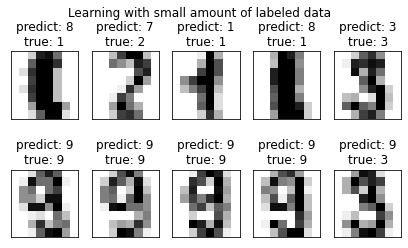

In [120]:
true_labels_50, predicted_labels_50 = label_exercise_function()

Verify y_train is randomly distributed and labels between 5 and 15 are hidden
[ 7  1  5  1  6 -1 -1 -1 -1 -1]

Label Spreading model: 10 labeled & 990 unlabeled points (1000 total)
Confusion matrix
[[ 99   0   0   0   0   0   0   0   0   0]
 [  0  89   0   0   1   0   5   0   0   1]
 [  0  80   0   0   1   0   1   3   0   8]
 [  0   5   0   0   3   2   0   2   0  98]
 [  0   0   0   0  91   0   0   3   0   0]
 [  0   0   0   0   2 101   0   0   0   5]
 [  0   0   0   0   0   1 108   0   0   0]
 [  0   0   0   0   1   0   0  93   0   0]
 [  0  42   0   0  11   3   0   0   0  34]
 [  0   8   0   0  10   3   0   1   0  75]]



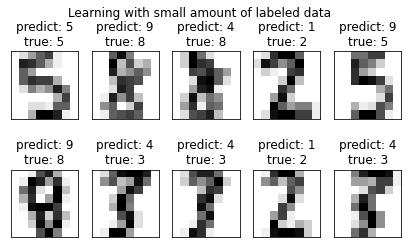

In [126]:
true_labels_10, predicted_labels_10 = label_exercise_function(number_of_known_labels=10)

Verify y_train is randomly distributed and labels between 50 and 150 are hidden
[ 0  1  9  7  3  3  1  1  8  8  9  8  5  4  4  7  3  5  8  4  3  1  3  8
  7  3  3  0  8  7  2  8  5  3  8  7  6  4  6  2  2  0  1  1  5  3  5  7
  6  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]

Label Spreading model: 100 labeled & 900 unlabeled points (1000 total)
Confusion matrix
[[95  0  0  0  0  0  0  0  0  0]
 [ 0 86  0  0  0  1  0  0  0  0]
 [ 0  4 79  3  0  0  0  0  2  0]
 [ 0  0  0 95  0  0  0  0  0  4]
 [ 0  0  0  0 84  0  0  0  0  0]
 [ 0  0  0  0  0 90  0  0  0  7]
 [ 0  0  0  0  0  0 97  0  0  0]
 [ 0  0  0  0  0  2  0 77  0  6]
 [ 0  3  0  2  1  0  0  0 72  0]
 [ 0  0  0  2  1  0  0  0  1 86]]



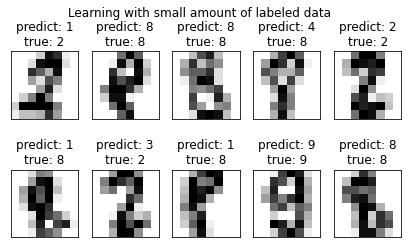

In [123]:
true_labels_100, predicted_labels_100 = label_exercise_function(number_of_known_labels=100)

Verify y_train is randomly distributed and labels between 125 and 375 are hidden
[ 8  1  9  2  1  9  1  0  3  4  3  0  9  3  2  2  7  3  1  6  7  2  8  3
  1  1  6  4  8  2  1  8  4  1  3  1  1  9  5  4  8  7  4  8  9  5  7  6
  9  0  0  4  0  0  4  0  6  5  8  8  3  7  9  2  0  3  2  7  3  0  2  1
  5  2  7  0  6  9  3  1  1  3  5  2  3  5  2  1  2  9  4  6  5  5  5  9
  7  1  5  9  6  3  7  1  7  5  1  7  2  7  5  5  4  8  6  6  2  8  7  3
  7  8  0  9  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

Label Spreading model: 250 labeled & 750 unlabeled points (1000 total)
Confusion matrix
[[81  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  1  0  0  1  0]
 [

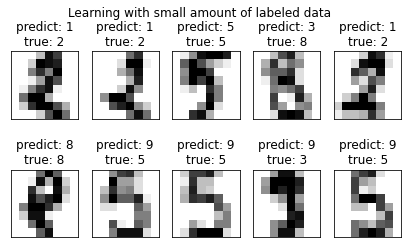

In [124]:
true_labels_250, predicted_labels_250 = label_exercise_function(number_of_known_labels=250)

Verify y_train is randomly distributed and labels between 250 and 750 are hidden
[ 7  4  3  4  1  0  3  3  5  4  1  3  1  2  5  1  4  0  3  1  5  5  7  4
  0  1  0  8  5  5  5  4  0  1  8  6  2  1  1  1  7  9  6  7  9  7  0  4
  9  6  9  2  7  2  1  0  8  2  8  6  5  7  8  4  5  7  8  6  5  2  6  9
  3  0  0  8  0  6  6  7  1  4  5  6  9  7  2  8  5  1  2  4  1  8  8  7
  6  0  8  0  6  5  5  7  8  0  4  1  4  5  9  2  2  3  9  1  3  9  3  2
  8  0  6  5  6  2  5  2  3  2  6  1  0  7  6  0  6  2  7  0  3  2  4  2
  9  6  9  7  7  0  3  5  4  1  2  2  1  2  7  7  0  4  9  8  5  6  1  6
  5  2  0  8  2  4  3  3  2  9  3  8  9  9  3  9  0  3  4  7  9  1  5  7
  5  0  5  3  5  0  2  7  3  0  4  3  6  6  1  9  6  3  4  6  4  6  7  2
  7  6  3  0  3  0  1  3  6  8  0  4  3  8  4  3  3  4  8  6  9  6  3  3
  0  5  7  8  9  1  5  3  2  5 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 

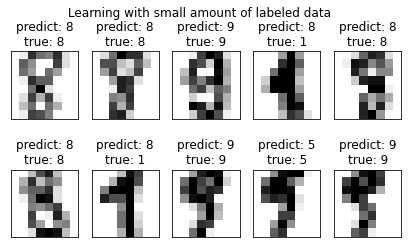

In [128]:
true_labels_500, predicted_labels_500 = label_exercise_function(number_of_known_labels=500)

In [129]:
print(classification_report(true_labels_10, predicted_labels_10))
print("\n")
print(classification_report(true_labels_50, predicted_labels_50))
print("\n")
print(classification_report(true_labels_100, predicted_labels_100))
print("\n")
print(classification_report(true_labels_250, predicted_labels_250))
print("\n")
print(classification_report(true_labels_500, predicted_labels_500))
print("\n")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       0.40      0.93      0.56        96
           2       0.00      0.00      0.00        93
           3       0.00      0.00      0.00       110
           4       0.76      0.97      0.85        94
           5       0.92      0.94      0.93       108
           6       0.95      0.99      0.97       109
           7       0.91      0.99      0.95        94
           8       0.00      0.00      0.00        90
           9       0.34      0.77      0.47        97

    accuracy                           0.66       990
   macro avg       0.53      0.66      0.57       990
weighted avg       0.53      0.66      0.58       990



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       0.85      0.90      0.88        93
           2       0.99      0.78      0.87        91
           3       0.9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
